# Exploratory analysis

## 1.2 Problem identification, data integration and cleaning

In [2]:
import os
import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset_path = r"..\data"

In [4]:
observation_file_name = "observation.csv"
patient_file_name = "patient.csv"
station_file_name = "station.csv"

In [5]:
observation = pd.read_csv(dataset_path + '/' + observation_file_name, sep='\t')
patient = pd.read_csv(dataset_path + '/' + patient_file_name, sep='\t')
station = pd.read_csv(dataset_path + '/' + station_file_name, sep='\t')

### (A-2b) Identify and initially resolve problems in the data, e.g.: inappropriate data structure, duplicate records that may arise after certain data transformations, inconsistent formats, missing values, outliers. There may be other problems in the data not listed here, or fewer problems than listed.

#### Missing Values

In [6]:

print("Observation null values")
print(observation.isnull().sum())

print("====================================================================================================")

print("Observation empty strings")
print((observation == '').sum())

print("====================================================================================================")


print("Patient null values")
print(patient.isnull().sum()) # found null values

print("====================================================================================================")


print("Patient empty strings")
print((patient == '').sum())

print("====================================================================================================")


print("Station null values")
print(station.isnull().sum())

print("====================================================================================================")


print("Station empty strings")
print((station == '').sum())
print()

Observation null values
SpO₂                     0
HR                       0
PI                       0
RR                       0
EtCO₂                    0
FiO₂                     0
PRV                      0
BP                       0
Skin Temperature         0
Motion/Activity index    0
PVI                      0
Hb level                 0
SV                       0
CO                       0
Blood Flow Index         0
PPG waveform features    0
Signal Quality Index     0
Respiratory effort       0
O₂ extraction ratio      0
SNR                      0
oximetry                 0
latitude                 0
longitude                0
dtype: int64
Observation empty strings
SpO₂                     0
HR                       0
PI                       0
RR                       0
EtCO₂                    0
FiO₂                     0
PRV                      0
BP                       0
Skin Temperature         0
Motion/Activity index    0
PVI                      0
Hb level           

In [7]:
# Substitude Null values to default values
patient['job'] = patient['job'].fillna("Not Stated")
patient['address'] = patient['address'].fillna("Not Stated")
patient['birthdate'] = patient['birthdate'].fillna("Not Stated")
patient['current_location'] = patient['current_location'].fillna("Not Stated")

print("Null values")
print(patient.isnull().sum())
print()
print("Not Stated")
print((patient == 'Not Stated').sum())


Null values
ssn                 0
job                 0
company             0
mail                0
address             0
name                0
birthdate           0
username            0
current_location    0
registration        0
blood_group         0
user_id             0
station_ID          0
dtype: int64

Not Stated
ssn                    0
job                 1476
company                0
mail                   0
address              316
name                   0
birthdate            949
username               0
current_location     105
registration           0
blood_group            0
user_id                0
station_ID             0
dtype: int64


#### Duplicated records

In [8]:
print(observation.duplicated().sum())
print(patient.duplicated().sum())
print(station.duplicated().sum()) # station has 1 duplicate row

0
0
1


In [9]:
# Delete Duplicates
station = station.drop_duplicates()
print(station.duplicated().sum())

0


#### Inapropriate data structures and inconsistent formats

In [10]:
print("Observation data types")
print(observation.dtypes)
print()

print("Patient data types")
print(patient.dtypes)
print()

print("Station data types")
print(station.dtypes)
print()

Observation data types
SpO₂                     float64
HR                       float64
PI                       float64
RR                       float64
EtCO₂                    float64
FiO₂                     float64
PRV                      float64
BP                       float64
Skin Temperature         float64
Motion/Activity index    float64
PVI                      float64
Hb level                 float64
SV                       float64
CO                       float64
Blood Flow Index         float64
PPG waveform features    float64
Signal Quality Index     float64
Respiratory effort       float64
O₂ extraction ratio      float64
SNR                      float64
oximetry                 float64
latitude                 float64
longitude                float64
dtype: object

Patient data types
ssn                 object
job                 object
company             object
mail                object
address             object
name                object
birthdate           ob

In [11]:
observation['oximetry'] = observation['oximetry'].astype(bool)

patient['birthdate'] = pd.to_datetime(patient['birthdate'], errors='coerce')
patient['registration'] = pd.to_datetime(patient['registration'], errors='coerce')

station['revision'] = pd.to_datetime(station['revision'], errors='coerce')

print(f"Observation Oximetry: {observation["oximetry"].dtypes}")
print(f"Patient Birthdate: {patient['birthdate'].dtypes}")
print(f"Patient Registration: {patient['registration'].dtypes}")
print(f"Station Revision: {station['revision'].dtypes}")


Observation Oximetry: bool
Patient Birthdate: datetime64[ns]
Patient Registration: datetime64[ns]
Station Revision: datetime64[ns]


C:\Users\polya\AppData\Local\Temp\ipykernel_23136\2426130389.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  patient['birthdate'] = pd.to_datetime(patient['birthdate'], errors='coerce')


# (B-2b) Checking the correctness of data
- # whether it contains abnormal values
- # whether it contains illogical data relationships that are a result of data collection and data annotation

### Abnormal values – values that are outside expected ranges or categories

In [12]:
observation.describe() # all values are within expected ranges

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,SV,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,latitude,longitude
count,12088.000000,12088.000000,12088.000000,12088.000000,12088.000000,12088.000000,12088.000000,12088.000000,12088.000000,12088.000000,...,12088.000000,12088.000000,12088.000000,12088.000000,12088.000000,12088.000000,12088.000000,12088.000000,12088.000000,12088.000000
mean,97.789144,80.675753,10.327800,16.340804,39.531746,58.819988,110.635328,104.606930,35.860435,9.016540,...,88.589706,4.169678,52.543862,48.785891,50.040721,51.649729,0.249610,29.975669,29.506871,7.158811
std,0.950132,5.156417,2.805859,0.970376,1.195541,14.818691,23.734484,4.092904,0.542262,1.002827,...,3.120557,0.202979,11.541959,13.604437,13.590957,13.658884,0.028937,5.767106,22.265141,71.970762
min,95.000000,60.000000,0.200000,12.000000,35.000000,21.000000,20.000000,90.000000,33.000000,5.473387,...,60.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.200000,20.000000,-54.800000,-122.867050
25%,97.029865,77.250440,8.226524,15.690670,38.732323,47.143882,95.637946,101.862408,35.501693,8.340295,...,86.505420,4.062011,44.823845,39.554208,41.010735,42.310923,0.224570,24.960789,15.794080,-68.300000
50%,97.942808,80.670109,10.465003,16.340153,39.525448,56.551599,110.321626,104.615750,35.860090,9.006308,...,88.596415,4.109274,52.549358,48.645060,50.093145,51.531253,0.249257,30.061484,35.882640,8.738120
75%,98.541417,84.138759,12.445203,16.982813,40.334549,71.196667,125.503456,107.344485,36.214512,9.695857,...,90.672998,4.199741,60.252690,58.114233,59.299025,60.788784,0.274759,34.947427,45.503690,57.355200
max,100.000000,100.000000,20.000000,20.000000,45.000000,100.000000,200.000000,120.000000,38.000000,12.835262,...,100.000000,8.000000,100.000000,100.000000,100.000000,100.000000,0.300000,40.000000,61.784910,171.253640


In [13]:
# max birthdate is 2025-09-08
# max registration date is 2025-09-21
# these are valid values

patient.describe()

,birthdate,registration,user_id,station_ID
count,1160,514,2109.000000,2109.000000
mean,1968-10-15 12:37:14.482758624,2022-02-18 12:33:37.120622336,1057.982456,396.365102
min,1909-10-08 00:00:00,2018-09-24 00:00:00,1.000000,0.000000
25%,1939-09-27 18:00:00,2020-04-30 06:00:00,515.000000,205.000000
50%,1969-06-23 00:00:00,2022-01-26 12:00:00,1049.000000,396.000000
75%,1998-01-14 00:00:00,2023-11-17 12:00:00,1597.000000,592.000000
max,2025-09-08 00:00:00,2025-09-21 00:00:00,2108.000000,790.000000
std,NaN,NaN,613.315783,226.317436


In [14]:
# max revision date is 2025-09-08
# max and min latitude and longitude values are also valid
station.describe()

,revision,latitude,longitude
count,206,790.000000,790.000000
mean,2020-09-13 13:37:51.844660224,29.510850,7.283042
min,2015-10-02 00:00:00,-54.800000,-122.867050
25%,2017-11-25 12:00:00,15.856510,-68.300000
50%,2020-09-26 00:00:00,35.827560,8.738120
75%,2023-06-17 18:00:00,45.501337,63.470678
max,2025-09-08 00:00:00,61.784910,171.253640
std,NaN,22.247226,72.143689


### Illogical data relationships

In [15]:
illogical_registration = patient[patient['registration'] < patient['birthdate']]
print("Patients registered before birthdate:", len(illogical_registration))

Patients registered before birthdate: 11


# (C-1b) Outlier detection, try to solve the problem with at least 2 techniques 
- # removing outliers or outlying observations 
- # replacing outliers with distribution limits (e.g. 5%, 95%)

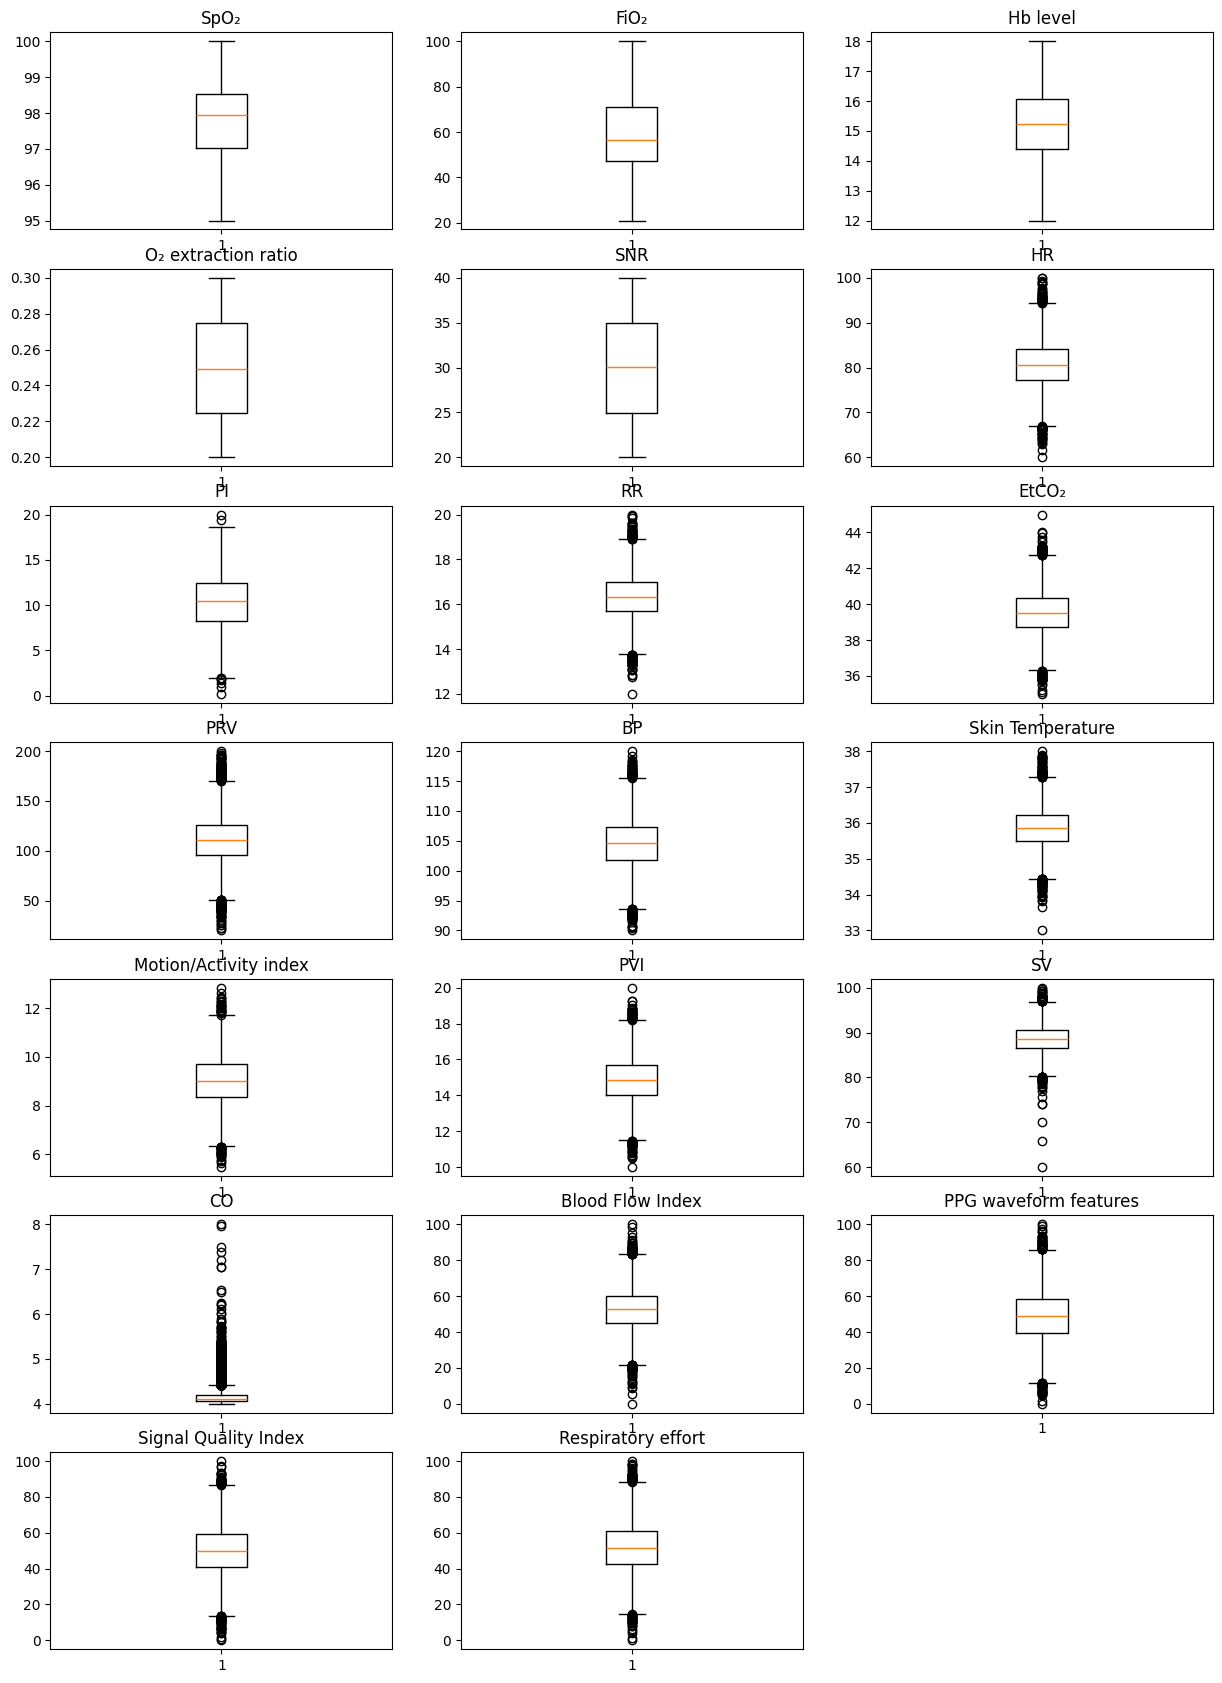

In [16]:
cols = [
    "SpO₂", "FiO₂", "Hb level", "O₂ extraction ratio", "SNR",
    "HR", "PI", "RR", "EtCO₂", "PRV", "BP", "Skin Temperature", 
    "Motion/Activity index", "PVI", "SV", "CO", "Blood Flow Index", 
    "PPG waveform features", "Signal Quality Index", "Respiratory effort"
]

n = len(cols)
rows = (n + 2) // 3

plt.figure(figsize=(15, rows * 3))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    plt.boxplot(observation[col])
    plt.title(col)
    
plt.show()

### removing outliers or outlying observations

In [22]:
cols_with_outliers = [
    "HR", "PI", "RR", "EtCO₂", "PRV", "BP", "Skin Temperature", 
    "Motion/Activity index", "PVI", "SV", "CO", "Blood Flow Index", 
    "PPG waveform features", "Signal Quality Index", "Respiratory effort"
]

observation_no_outliers = observation.copy()

outlier_indices = set()

for col in cols_with_outliers:
    Q1 = observation_no_outliers[col].quantile(0.25)
    Q3 = observation_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
        
    # Get outliers for this column
    col_outliers = observation_no_outliers[
        (observation_no_outliers[col] < (Q1 - 1.5*IQR)) | 
        (observation_no_outliers[col] > (Q3 + 1.5*IQR))
    ]
        
    outlier_indices.update(col_outliers.index)  # Add these indexes to the set

# Remove all unique outlier rows at once
observation_no_outliers = observation_no_outliers.drop(index=outlier_indices)

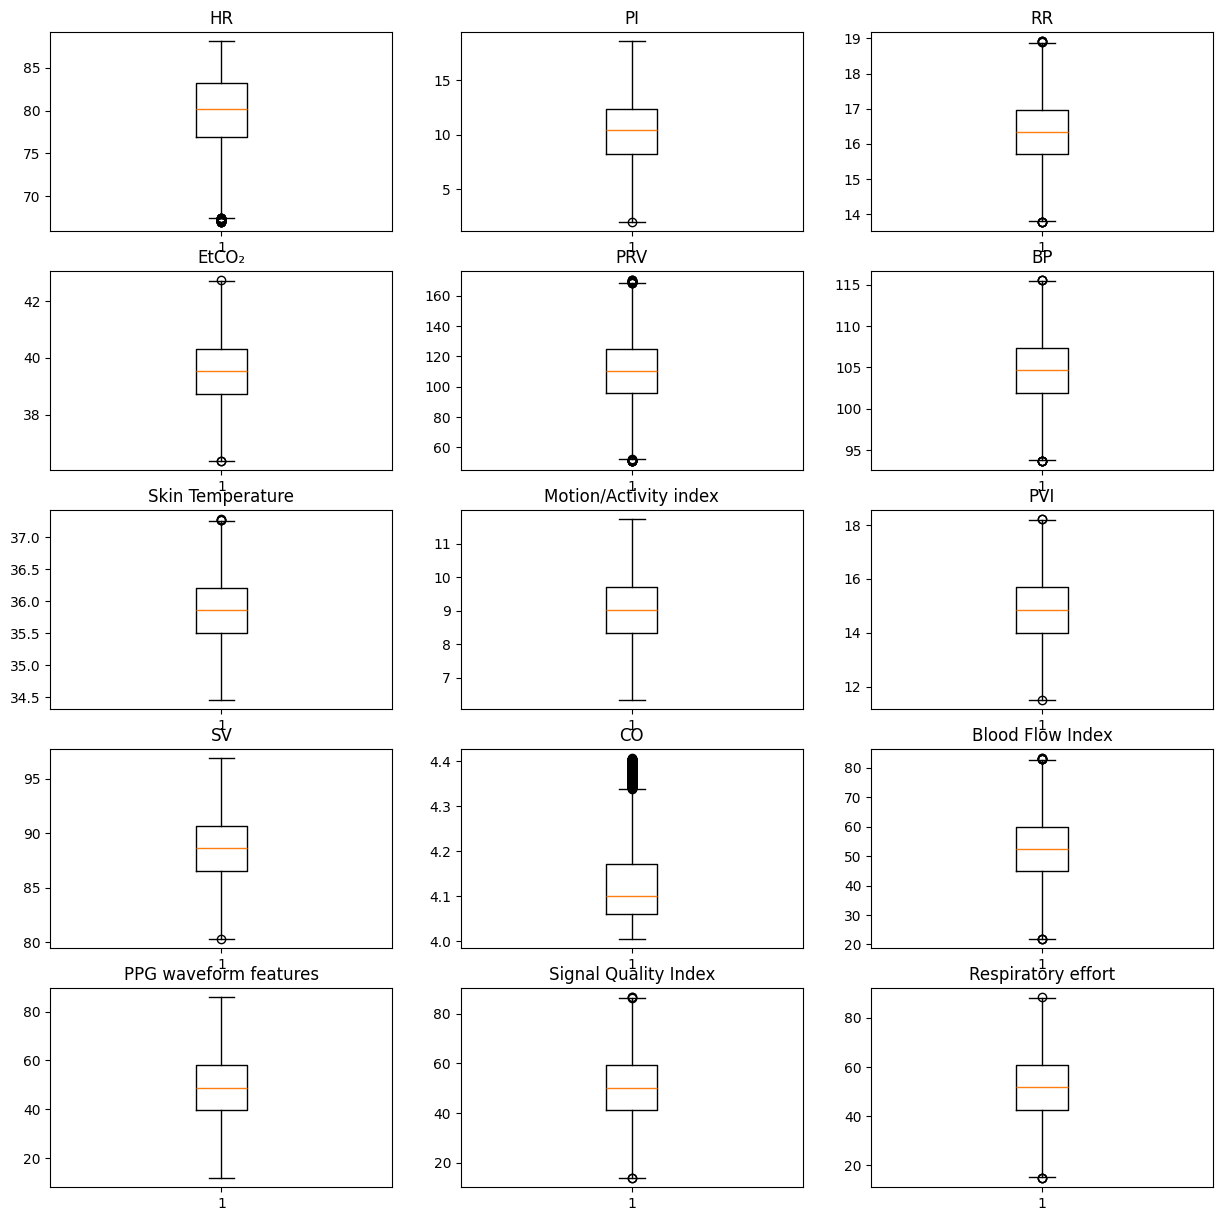

In [23]:
cols_with_outliers = [
    "HR", "PI", "RR", "EtCO₂", "PRV", "BP", "Skin Temperature", 
    "Motion/Activity index", "PVI", "SV", "CO", "Blood Flow Index", 
    "PPG waveform features", "Signal Quality Index", "Respiratory effort"
]

n = len(cols_with_outliers)
rows = (n + 2) // 3

plt.figure(figsize=(15, rows * 3))

for i, col in enumerate(cols_with_outliers, 1):
    plt.subplot(rows, 3, i)
    plt.boxplot(observation_no_outliers[col])
    plt.title(col)
    
plt.show()

### replacing outliers with distribution limits (e.g. 5%, 95%)

In [25]:
from scipy.stats.mstats import winsorize

cols_with_outliers = [
    "HR", "PI", "RR", "EtCO₂", "PRV", "BP", "Skin Temperature", 
    "Motion/Activity index", "PVI", "SV", "CO", "Blood Flow Index", 
    "PPG waveform features", "Signal Quality Index", "Respiratory effort"
]

observation_no_outliers = observation.copy()

for col in cols_with_outliers:
    if col in observation_no_outliers.columns:
        # Apply winsorization: replace bottom 5% and top 5%
        observation_no_outliers[col] = winsorize(observation_no_outliers[col], limits=[0.05, 0.05])

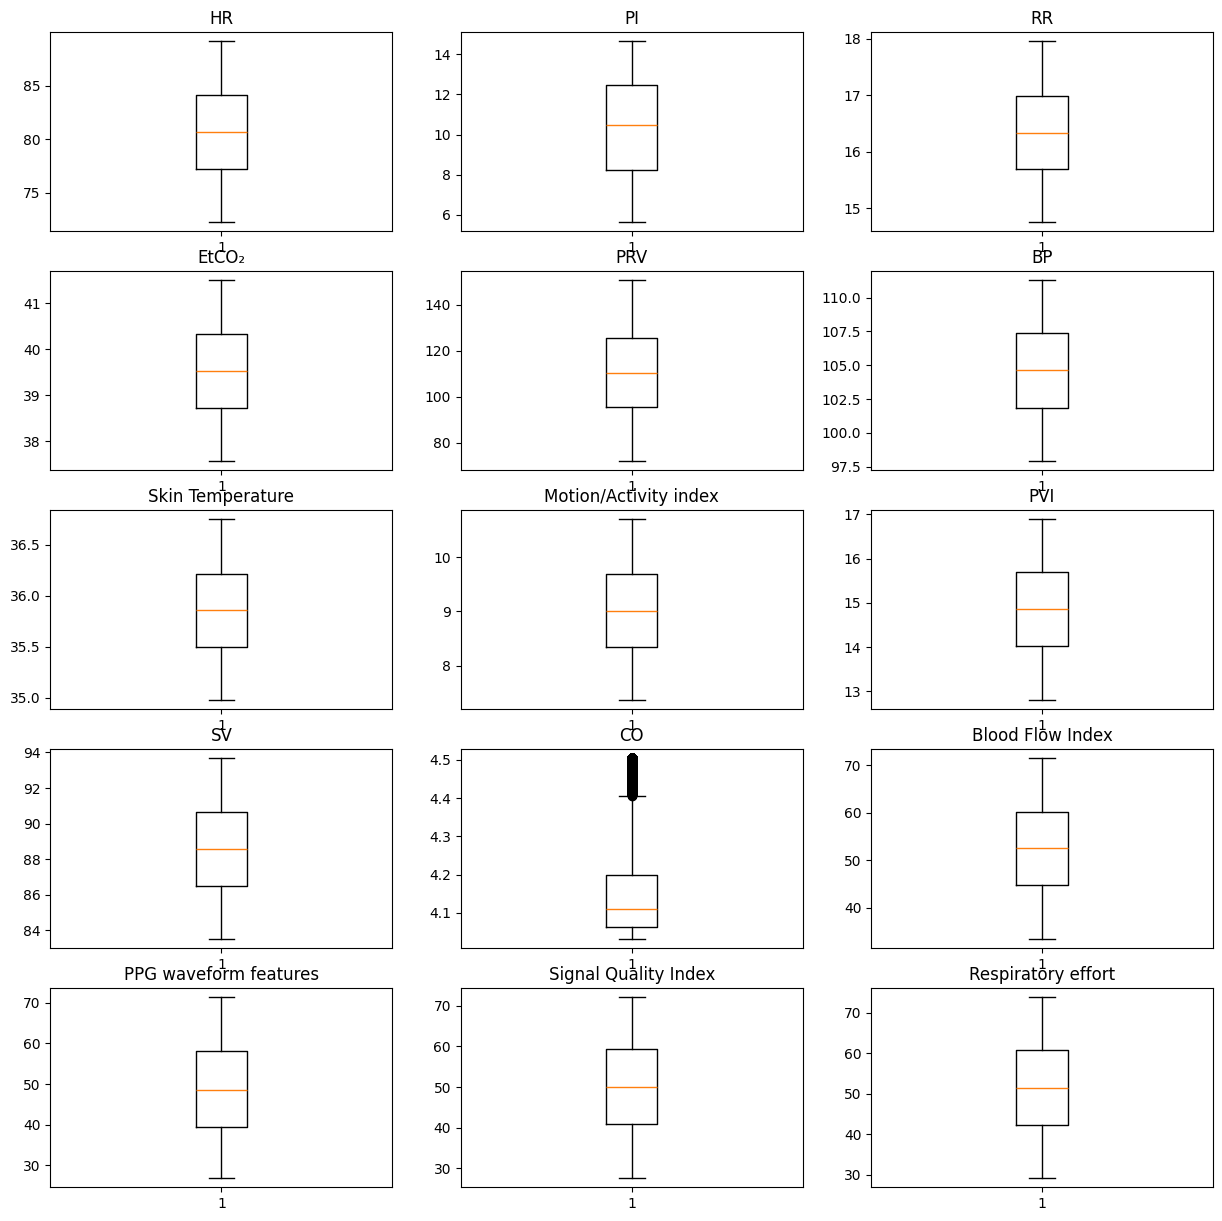

In [26]:
cols_with_outliers = [
    "HR", "PI", "RR", "EtCO₂", "PRV", "BP", "Skin Temperature", 
    "Motion/Activity index", "PVI", "SV", "CO", "Blood Flow Index", 
    "PPG waveform features", "Signal Quality Index", "Respiratory effort"
]

n = len(cols_with_outliers)
rows = (n + 2) // 3

plt.figure(figsize=(15, rows * 3))

for i, col in enumerate(cols_with_outliers, 1):
    plt.subplot(rows, 3, i)
    plt.boxplot(observation_no_outliers[col])
    plt.title(col)
    
plt.show()